In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


Bad key "text.kerning_factor" on line 4 in
/home/david/anaconda2/envs/python_3_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# prepare labels and colors
methods=['stable_motifs_new','sm_jgtz', 'boolsim','CABEAN', 'PyBoolNet']
colors=['#5959AB','#F0810F','#cc0000','#ff33cc','#26B96F'] 
labels=['Stable Motifs 2021', 'Stable Motifs 2013','BoolSim', 'CABEAN', 'PyBoolNet']
color_dict=dict(zip(methods,colors))
label_dict=dict(zip(methods,labels))

In [3]:
# import and organize raw timing data and display completion counts
df=pd.read_excel('timing_results_RBN.xlsx')
df['N']=df.apply(lambda row: int(row['model'].split('N_')[-1].split('_')[0]),axis=1)
df=df[methods+['N']]
df.groupby('N').agg('count')[methods]

,stable_motifs_new,sm_jgtz,boolsim,CABEAN,PyBoolNet
N,,,,,
10,10,10,10,10,10
20,10,9,10,9,10
30,9,10,10,10,10
40,10,8,9,9,8
50,10,10,6,6,1


In [4]:
# process data into data dictionary for plotting
N_range=sorted(set(df['N']))
N_data={}
for N in N_range:
    N_data[N]=[]
    for method in methods:
        N_data[N].append(df[method][df[method].astype(str).str.replace('.', '').str.isnumeric()][df['N']==N].values)

In [5]:
N_data

{10: [array([0.13299453, 0.17796461, 0.14207199, 0.28290099, 0.23467091,
         0.11138523, 0.13480608, 0.68177074, 0.24380255, 0.41558852]),
  array([2.70644859, 2.46719742, 3.10628371, 6.03298816, 3.5837742 ,
         3.2388121 , 2.94951819, 5.84906665, 4.56622134, 7.28769252]),
  array([0.25101212, 0.11861975, 0.1231813 , 0.11854009, 0.12064191,
         0.15253497, 0.15633468, 0.16605466, 0.42814948, 0.21231734]),
  array([0.06004516, 0.06218608, 0.04696938, 0.04660838, 0.05941637,
         0.06049897, 0.05448652, 0.06857059, 0.09474102, 0.07687634]),
  array([0.09534486, 0.12215345, 0.18424   , 0.16966897, 0.23169728,
         0.08898271, 0.08614431, 0.27316441, 0.3468824 , 0.51181145])],
 20: [array([1.46173227, 0.37687094, 0.36990667, 0.69357218, 3.32473666,
         2.3020121 , 0.13367885, 1.7005467 , 0.23357835, 0.19582492]),
  array([13.16589578,  6.52617766, 16.6743117 , 40.49023525,  3.93657579,
          4.87773921, 14.09607318,  5.69878414,  6.33562562]),
  array([0.288

# Box plots with log base 60

In [6]:
# define the base-60 logarithm
def log60(x): return np.log(x)/np.log(60)

/home/david/anaconda2/envs/python_3_env/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/david/anaconda2/envs/python_3_env/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/david/anaconda2/envs/python_3_env/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (whi

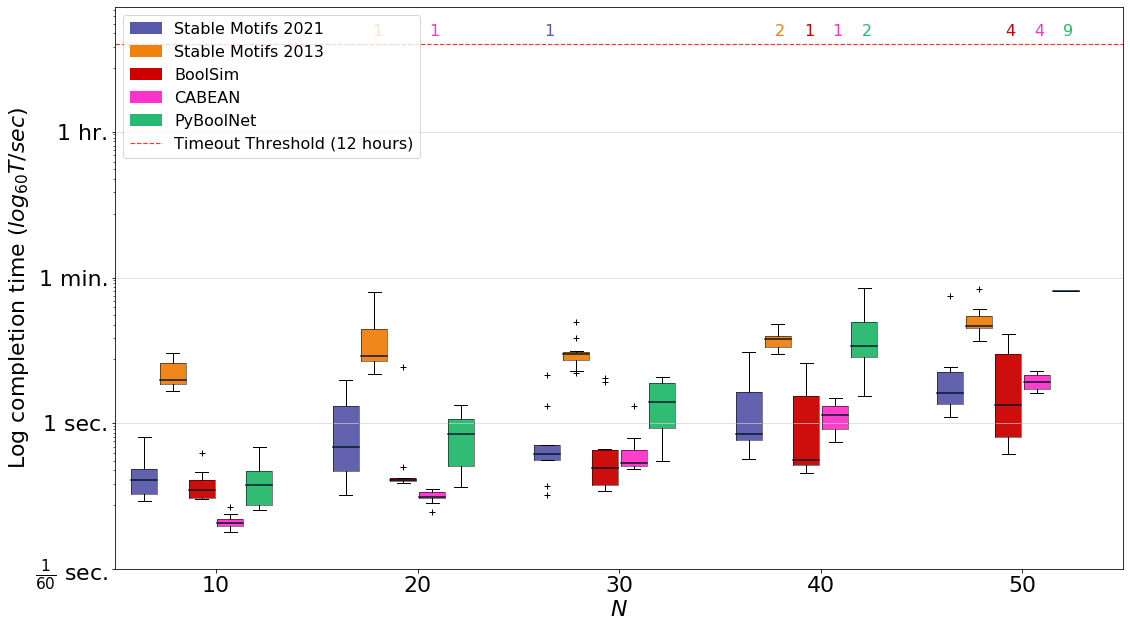

In [10]:
fsa=16
ymax = log60(12*3600)+0.25
# initialize plots
fig, ax1 = plt.subplots(figsize=(16, 12),facecolor='white')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

# prepare box plots
medianprops = dict(linestyle='-', linewidth=1.5, color='#011A27')
boxprops = dict(linestyle='-', linewidth=0.5, color='black')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.8)

# construct box plots (using the log-transformed data)
pos_index=1
for N in N_range:
    bp = ax1.boxplot([np.log10(N_data[N][i].astype(float))/np.log10(60) for i in range(len(N_data[N]))], 
                     notch=0, sym='+', vert=1, whis=1.5,positions=range(pos_index,len(methods)+pos_index),
                     widths = 0.9,medianprops=medianprops, boxprops=boxprops)
    
    for i in range(len(methods)):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax1.add_patch(Polygon(box_coords, facecolor=color_dict[methods[i]],alpha=0.95))
        #adding the completion counts
        not_completed=10-len(N_data[N][i])
        if not_completed!=0:
            ax1.annotate(not_completed,xy=(np.mean(box_x),ymax-0.2), color=color_dict[methods[i]],size=fsa)
    pos_index+=len(methods)+2

# display plots
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='black', marker='+')

# horizontal line to show the timeout cutoff
hline3=plt.hlines(np.log10(12*3600)/np.log10(60),0, (len(methods)+2)*len(N_range), 
                  colors='red', linestyles='--', label='Timeout Threshold (12 hours)', alpha=0.8, linewidth=1.2)

# prepare legend, ticks, and axis labels
legend_elements = [Patch(facecolor=color_dict[i], label=label_dict[i]) for i in methods]
legend_elements+=[hline3]
x = [i for i in range(-1,3)]

ytick_pos = [-1,0,1,2]
ax1.set_yticks(ytick_pos)
ax1.set_yticklabels([r'$\frac{1}{60}$ sec.','1 sec.','1 min.','1 hr.'],rotation=0)
mticks=[]
minor_interval=5
for k in ytick_pos:
    mticks+=[log60(60**k+i*60**k) for i in range(minor_interval,60,minor_interval)]
minors=ax1.set_yticks(mticks,minor=True)




# display legend and labels
plt.legend(handles=legend_elements,fontsize=16, loc='upper left')
plt.xlim([0,(len(methods)+2)*len(N_range)])
plt.ylim(ymax=ymax)
plt.xticks(np.linspace(len(methods)+2,(len(methods)+2)*len(N_range),
                       len(N_range))-((len(methods)+2)/2.),
                       N_range, fontsize=22)
plt.yticks(fontsize=22)
xlab=plt.xlabel(r'$N$',fontsize=22)
ylab=plt.ylabel(r'Log completion time ($log_{60} T/sec )$',fontsize=22)